In [33]:
import importlib

import gridify as gy
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import seaborn as sns

importlib.reload(gy)



<module 'gridify' from '/Users/hj/Desktop/cluster-ambiguity/cambiguity/gridify.py'>

In [3]:
X, y = load_digits(return_X_y=True)
X_tsne = TSNE(n_components=2).fit_transform(X)
X_pca = PCA(n_components=2).fit_transform(X)

/Users/hj/opt/anaconda3/envs/camb/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/hj/opt/anaconda3/envs/camb/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<AxesSubplot:>

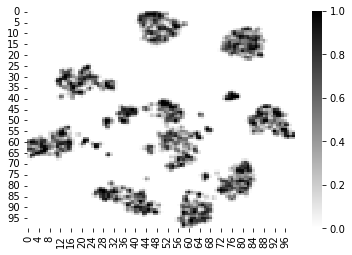

In [37]:
X_tsne_grid = gy.gridify(X_tsne, 0.2, 10, 1000, 100)

sns.heatmap(X_tsne_grid, cmap='binary')